# Creando el conecta 6

In [59]:
from connect6_game import Connect6
from mcts_algorithm import ResNet, AlphaZero
import numpy as np
import torch


connect6 = Connect6()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

player = 1
args = {
    'C': 1.41,
    'num_searches': 10,
    'num_iterations': 3,
    'num_selfPlay_iterations': 10,
    'num_epochs': 1,
    'batch_size': 64,
    'temperature': 1.25,
    'dirichlet_epsilon': 0.25,
    'dirichlet_alpha': 0.3
}

model = ResNet(connect6, 4, 64, device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

alphaZero = AlphaZero(model, optimizer, connect6, args)
alphaZero.learn()

100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


In [ ]:
# Funciones auxiliares

def command2action(command):
    """
    Convertir un comando en un indice de accion
    """
    row = ord(command[0]) - ord('A')
    column = ord(command[1]) - ord('A')
    return row * 19 + column


def simular_n_partidas_random(args):

    for n in tqdm(range(args['n_partidas'])):
        c6 = Connect6()
        state = c6.get_initial_state()
        player = 1 # Black

        # Simular una partida aleatoriamente
        while True:
            
            #Para el primer turno (solo una accion)
            if c6.turno == 0: 
                pos = random.randint(0, c6.action_size - 1)#Selector de posicion (AQUI SE DEBE PONER EL MODELO)
                state = c6.get_next_state(state, pos, player)# Se actualiza el estado con la pos escogida
                c6.turno += 1 # Se aumenta el turno
                
            # Resto de turnos (dos acciones)
            else:
                for j in range(2):
                    
                    #Comprobamos que la accion es valida
                    while c6.get_valid_moves(state)[pos] == 0:
                        pos = random.randint(0, c6.action_size - 1)# Selector de posicion (AQUI SE DEBE PONER EL MODELO)
                    
                    #Comprobamos si hay ganador
                    value, is_terminated = c6.get_value_and_terminated(state, pos)

                    if is_terminated:
                        # print("Ganador:", player)
                        # print("Turno", c6.turno)
                        # print("Posicion:", pos)
                        state = c6.get_next_state(state, pos, player)
                        # Registrar en el csv el ganador y el turno
                        with open(args['output_dir'], 'a') as f:
                            f.write(f'{player},{c6.turno}\n')
                        
                        break
                    else:
                        state = c6.get_next_state(state, pos, player)# Se actualiza el estado con la pos escogida
                        
                    c6.turno += 1
            
                if is_terminated:
                    break
            
            player = c6.get_opponent(player)





In [33]:
# Crear el entorno del juego de Conecta 6








if False:
    c6 = Connect6()
    state = c6.get_initial_state()
    player = 1 # Black

    print('Jugador negro:', player)
    print('Jugador blanco: ', player*-1)


    # Simular una partida aleatoriamente
    while True:
        
        #Para el primer turno (solo una accion)
        if c6.turno == 0: 
            pos = random.randint(0, c6.action_size - 1)#Selector de posicion (AQUI SE DEBE PONER EL MODELO)
            state = c6.get_next_state(state, pos, player)# Se actualiza el estado con la pos escogida
            c6.turno += 1 # Se aumenta el turno
            
        # Resto de turnos (dos acciones)
        else:
            for j in range(2):
                
                #Comprobamos que la accion es valida
                while c6.get_valid_moves(state)[pos] == 0:
                    pos = random.randint(0, c6.action_size - 1)# Selector de posicion (AQUI SE DEBE PONER EL MODELO)
                
                #Comprobamos si hay ganador
                value, is_terminated = c6.get_value_and_terminated(state, pos)

                if is_terminated:
                    print("Ganador:", player)
                    print("Turno", c6.turno)
                    print("Posicion:", pos)
                    # state = c6.get_next_state(state, pos, player)
                    
                    
                    break
                else:
                    state = c6.get_next_state(state, pos, player)# Se actualiza el estado con la pos escogida
                    

                c6.turno += 1
        
            if is_terminated:
                # c6.show_state(state)
                
                break
        # print("Turno", c6.turno)
        # c6.show_state(state)
        
        #Cambio de jugador
        player = c6.get_opponent(player)
    
   
args = {'n_partidas': 1000,
        'output_dir': 'random_simulation_c6.csv'}




# simular_n_partidas_random(args)









100%|██████████| 1000/1000 [12:07<00:00,  1.37it/s]


winner
-1    551
 1    529
Name: count, dtype: int64


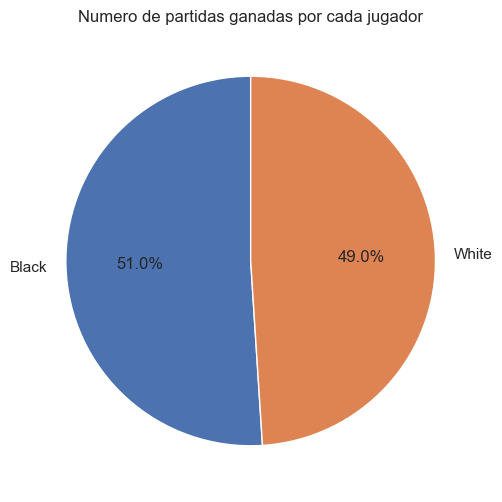

In [55]:
# Cargar csv con las partidas simuladas
import pandas as pd
df = pd.read_csv('random_simulation_c6.csv')
df.head()

# Analizar los datos, se desea comprobar si el hecho de comenzar la partida da ventaja
# o si el numero de turnos influye en el resultado de la partida

# Grafico de tarta con el numero de partidas ganadas por cada jugador
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Numero de partidas ganadas por cada jugador
n_wins = df['winner'].value_counts()
print(n_wins)

# Grafico de tarta
plt.figure(figsize=(6,6))
plt.pie(n_wins, labels=['Black', 'White'], autopct='%1.1f%%', startangle=90)
plt.title('Numero de partidas ganadas por cada jugador')
plt.show()





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from tictactoe_game import TicTacToe
from mcts_algorithm import AlphaZero, ResNet
import torch

# Create a new game
tictactoe = TicTacToe()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Crear la situacion inicial
state = tictactoe.get_initial_state()#Tablero en blanco
state = tictactoe.get_next_state(state, 2, -1)#Hacer un movimiento
state = tictactoe.get_next_state(state, 4, 1)#Hacer un movimiento
state = tictactoe.get_next_state(state, 6, -1)#Hacer un movimiento
state = tictactoe.get_next_state(state, 8, 1)#Hacer un movimiento
plt.figure(figsize=(5,5))
sns.heatmap(state, annot=True, cmap="YlGnBu", cbar = False, linewidths=.5, linecolor="black")
plt.show()

print(state.shape)
encoded_state = tictactoe.get_encoded_state(state)
tensor_state = torch.tensor(encoded_state, device = device).unsqueeze(0)

# Crear el modelo
model = ResNet(tictactoe, 4, 64, device=device)
model.load_state_dict(torch.load('./models/model_2.pt'))
model.eval()

policy, value = model(tensor_state)
value = value.item()
policy = torch.softmax(policy, axis=1).squeeze(0).detach().cpu().numpy()


print("Value: ", value)
# print("Tensor: ", tensor_state)

plt.bar(range(tictactoe.action_size), policy)
plt.show()

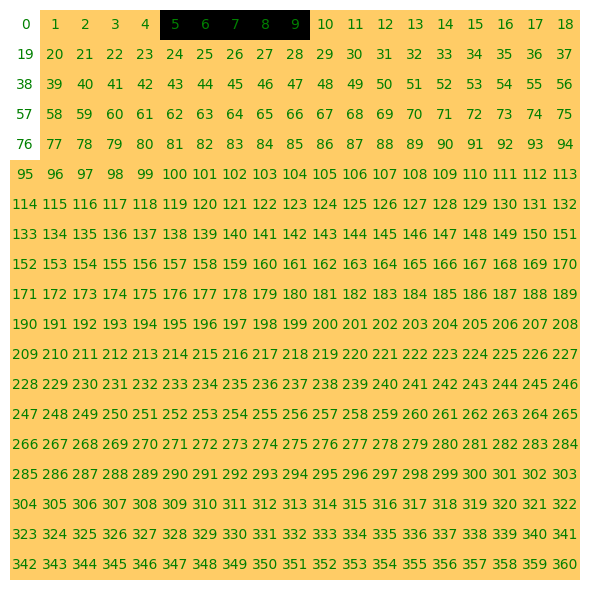

TypeError: Connect6.get_heuristic_value() missing 2 required positional arguments: 'action' and 'player'

In [1]:
# Importar todas las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from connect6_game import Connect6
from mcts_algorithm import AlphaZero, ResNet, MinMax_alfa_beta


def connect6_heuristic(board):
    # Estrategias ofensivas: intentar crear múltiples conexiones cercanas.
    offensive_score = 0
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i][j] == 1:  # Ficha negra
                # Verificar conexiones horizontales.
                if j < len(board[0])-5:
                    if board[i][j+1:j+6] == [1]*5:
                        offensive_score += 10
                # Verificar conexiones verticales.
                if i < len(board)-5:
                    if [board[i+k][j] for k in range(5)] == [1]*5:
                        offensive_score += 10
                # Verificar conexiones diagonales.
                if j < len(board[0])-5 and i < len(board)-5:
                    if [board[i+k][j+k] for k in range(5)] == [1]*5:
                        offensive_score += 10
                if j < len(board[0])-5 and i >= 4:
                    if [board[i-k][j+k] for k in range(5)] == [1]*5:
                        offensive_score += 10

    # Estrategias defensivas: bloquear las posibles líneas de conexión del oponente.
    defensive_score = 0
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i][j] == -1:  # Ficha blanca
                # Verificar conexiones horizontales.
                if j < len(board[0])-5:
                    if board[i][j+1:j+6] == [-1]*5:
                        defensive_score += 10
                # Verificar conexiones verticales.
                if i < len(board)-5:
                    if [board[i+k][j] for k in range(5)] == [-1]*5:
                        defensive_score += 10
                # Verificar conexiones diagonales.
                if j < len(board[0])-5 and i < len(board)-5:
                    if [board[i+k][j+k] for k in range(5)] == [-1]*5:
                        defensive_score += 10
                if j < len(board[0])-5 and i >= 4:
                    if [board[i-k][j+k] for k in range(5)] == [-1]*5:
                        defensive_score += 10

    total_score = offensive_score - defensive_score

    return total_score




# Create a new game
c6 = Connect6()


# Crear la situacion inicial
state = c6.get_initial_state()#Tablero en blanco
for i in range(5):
    state = c6.get_next_state(state, i*19, -1)#Hacer un movimiento
    state = c6.get_next_state(state, i +5, 1)#Hacer un movimiento

c6.show_state(state)

# buscar el mejor movimiento
best_move = minmax.get_action(state)
print(best_move)

# Ejecutar movimiento
state = c6.get_next_state(state, best_move, 1)


# # Create a new game
# c6 = Connect6()

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Crear la situacion inicial
# state = c6.get_initial_state()#Tablero en blanco
# for i in range(5):
#     state = tictactoe.get_next_state(state, i, -1)#Hacer un movimiento
# # state = tictactoe.get_next_state(state, 4, 1)#Hacer un movimiento
# # state = tictactoe.get_next_state(state, 6, -1)#Hacer un movimiento
# # state = tictactoe.get_next_state(state, 8, 1)#Hacer un movimiento

# tictactoe.show_state(state)


# print(state.shape)
# encoded_state = tictactoe.get_encoded_state(state)
# tensor_state = torch.tensor(encoded_state, device = device).unsqueeze(0)

# # Crear el modelo
# model = ResNet(tictactoe, 4, 64, device=device)
# model.load_state_dict(torch.load('./models/model_2_Connect6.pt'))
# model.eval()

# policy, value = model(tensor_state)
# value = value.item()
# policy = torch.softmax(policy, axis=1).squeeze(0).detach().cpu().numpy()


# print("Value: ", value)
# # print("Tensor: ", tensor_state)

# plt.bar(range(tictactoe.action_size), policy)
# plt.show()

# pos = np.argmax(policy)
# print(pos)

None


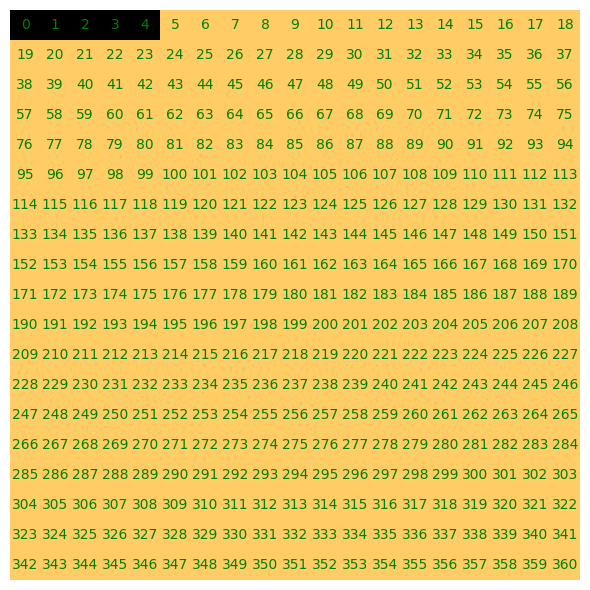

In [3]:
from connect6_game import Connect6

c6 = Connect6()

state = c6.get_initial_state()




def count_treats(state):
    """Algorithm to count the number of threats in one line of the board in the game of Connect6."""

    # Paso 1: For a line, slide a window of 6 positions from the left to the right.
    # Paso 2: Repeat the following step for each sliding window.
    # Paso 3: If the window contains neither white stones (-1) nor marked squares (0) and at least four black stones (1), add one more threat and mark the rightmost empty square. The window satisfying the condition is called a threat window.

    # Horizontal threats (rows) 
    threats = 0



In [8]:
import numpy as np

def count_threats(board):
    threats = 0
    threatened_positions = []

    # Define parameters
    k = 6  # Connect6
    p = 1  # One stone per move
    q = 0  # No restriction on connections

    # Define the size of the sliding window
    window_size = k

    # Slide window from left to right
    for i in range(board.shape[0]):
        for j in range(board.shape[1] - window_size + 1):
            window = board[i, j:j+window_size]
            print(window)

            # Check if the window contains only black stones and empty squares
            if np.count_nonzero(window == 1) >= k - p and np.count_nonzero(window == -1) == p:
                threats += 1
                print(f"Threat found at position ({i}, {j})"

                # Mark the threatened positions
                threatened_positions.extend([(i, j+idx) for idx, val in enumerate(window) if val == 0])

    return threats, threatened_positions

# Example usage
board = np.zeros((19,19))

for i in range(4):
    board[i, i:i+4] = 1

print(board)

threats, threatened_positions = count_threats(board)

print(f"Number of threats: {threats}")
print(f"Threatened positions: {threatened_positions}")

[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

9.0 0.9772255750516612


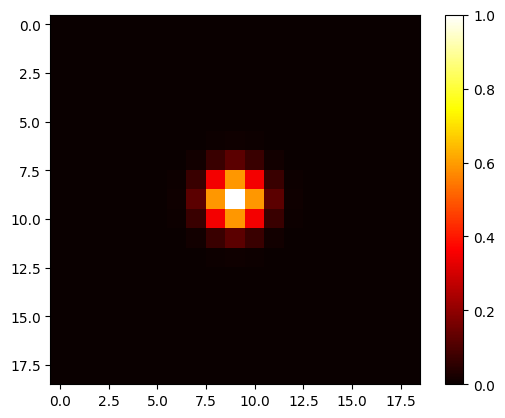

In [34]:
import numpy as np

def gaussian(x, mu, sigma):
    coefficient = 1 / (np.sqrt(2 * np.pi * sigma**2))
    exponent = -((x - mu)**2) / (2 * sigma**2)
    return coefficient * np.exp(exponent)

def get_gaussian_grid(size):

    valores = np.arange(19)

    # Definir la media y la desviación estándar
    mu = valores.mean()
    sigma = valores.std() - 4.5
    print(mu, sigma)

    grid = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            grid[i, j] = gaussian(i, mu, sigma) * gaussian(j, mu, sigma)

    # Normalizar el grid entre 0 y 1
    grid = (grid - grid.min()) / (grid.max() - grid.min())
    return grid

grid = get_gaussian_grid(19)
# mostrar el array
import matplotlib.pyplot as plt
plt.imshow(grid, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


# # Crear un array de 19 elementos con distribución gaussiana
# n_elementos = 19
# valores_gaussianos = [gaussian(x, mu, sigma) for x in range(n_elementos)]

# # Convertir la lista a un array de NumPy
# array_gaussiano = np.array(valores_gaussianos)

# print(array_gaussiano)

# # mostrar el array
# import matplotlib.pyplot as plt
# plt.plot(array_gaussiano)